# BeautyBot: Product Ratings Predictions
In this notebook, we will execute exploratory data analysis (EDA) and test multiple models to eventually build a predictive model to analyze Sephora's product catalog and predict the ratings they would receive. 

### 1. Importing Libraries and Dataset

In [15]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# importing data
sephora = pd.read_csv("sephora_website_dataset.csv")

In [19]:
sephora

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


### 2. Data Overview

In [49]:
# making sure there are no empty columns and observing the data types in the set.
df = sephora
df = pd.DataFrame(df)
df.columns = df.columns.str.strip()
print(f"Dataset shape: {df.shape}")

Dataset shape: (9168, 21)


In [51]:
# generating a summary of the dataset
def summary(df):
    summary = pd.DataFrame({})
    summary.index.name = 'Column name'
    summary['dtype'] = df.dtypes
    summary['num of nulls'] = df.isnull().sum()
    summary['num of unique values'] = df.nunique()
    return summary.sort_values

summary(df)
    

<bound method DataFrame.sort_values of                           dtype  num of nulls  num of unique values
Column name                                                        
id                        int64             0                  9115
brand                    object             0                   324
category                 object             0                   143
name                     object             0                  9106
size                     object             0                  1623
rating                  float64             0                    10
number_of_reviews         int64             0                   833
love                      int64             0                  1683
price                   float64             0                   286
value_price             float64             0                   322
URL                      object             0                  9168
MarketingFlags             bool             0                     2
Marketing

### 3. Preprocessing the Data

In [54]:
# creating a new column for discounted items
df['discount_perc'] = ((df['price'] / df['value_price']) - 1) * 100

In [56]:
# creating a function that will get the mL from the size column and remove extra spaces

def extract_ml(df, column='size'):
    df['mL_extracted'] = (
        df[column]
        .astype(str)
        .str.replace(r'\s+', '', regex=True)  # remove all spaces
        .str.extract(r'(\d+\.?\d*)mL', expand=False)  # extract the number before 'mL'
        .astype(float)  # convert to float
    )
    return df

extract_ml(df, 'size')

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,discount_perc,mL_extracted
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,-12.000000,5.0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,0.000000,20.0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,0.000000,148.0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,0.000000,74.0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,-10.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0,0.000000,NaN
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0,-44.444444,NaN
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0,0.000000,28.0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0,0.000000,NaN


In [58]:
df[['value_price' , 'price' , 'discount_perc' , 'size' , 'mL_extracted']].head(10)

,value_price,price,discount_perc,size,mL_extracted
0,75.0,66.0,-12.0,5 x 0.16oz/5mL,5.0
1,66.0,66.0,0.0,0.7 oz/ 20 mL,20.0
2,180.0,180.0,0.0,5 oz/ 148 mL,148.0
3,120.0,120.0,0.0,2.5 oz/ 74 mL,74.0
4,80.0,72.0,-10.0,5 x 0.16oz/5mL,5.0
5,180.0,180.0,0.0,5 oz/ 148 mL,148.0
6,210.0,210.0,0.0,3.4 oz/ 101 mL,101.0
7,120.0,120.0,0.0,1.7 oz/ 50 mL,50.0
8,58.0,58.0,0.0,1.7oz/50mL,50.0
9,58.0,58.0,0.0,1.7oz/50mL,50.0


In [69]:
# getting rid of useless columns

irr_columns = ['MarketingFlags_content' , 'MarketingFlags' , 'URL' ] # irrelevant columns
rel_columns = [col for col in irr_columns if col in df.columns] # relevant columns
df = df.drop(columns=rel_columns)
df.columns

Index(['brand', 'category', 'size', 'rating', 'number_of_reviews', 'love',
       'price', 'value_price', 'online_only', 'exclusive', 'limited_edition',
       'limited_time_offer'],
      dtype='object')

In [62]:
# getting rid of any duplicates

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### 4. Exploratory Data Analysis

#### 4.1 Price Distribution 

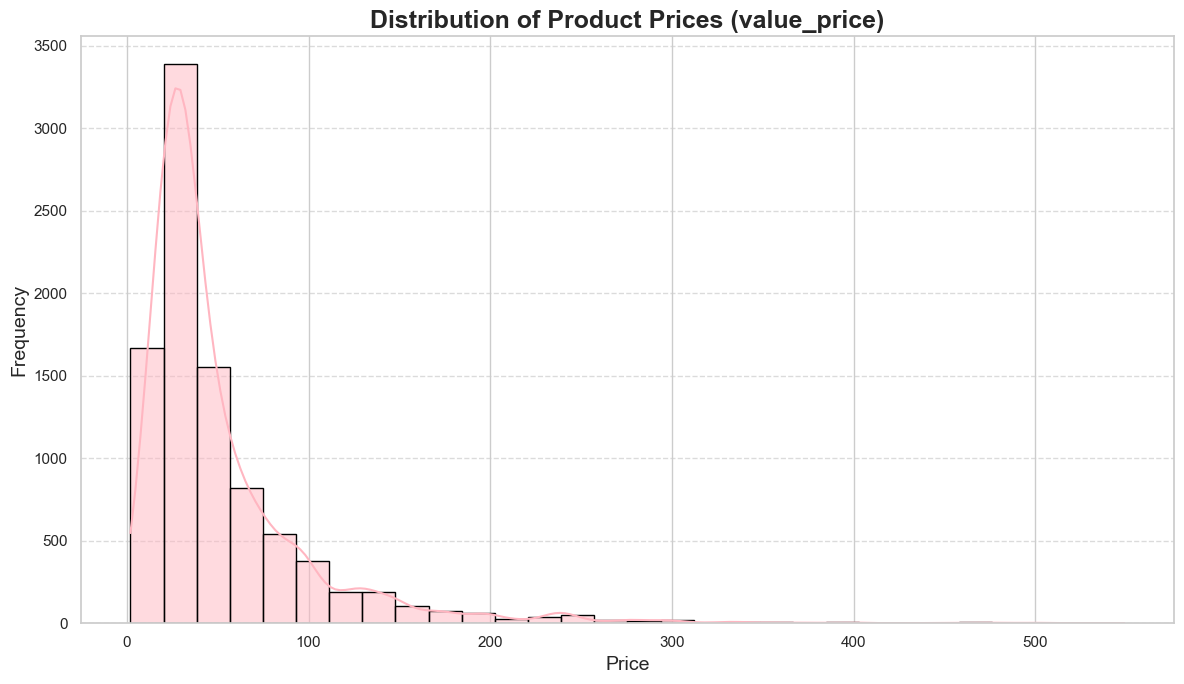

In [111]:
# setting style

sns.set_theme(style="whitegrid")

# plotting the distribution of prices in the 'value_price' column
plt.figure(figsize=(12, 7))
sns.histplot(df['value_price'], bins = 30, kde=True, color="lightpink" , edgecolor="black" )
plt.title('Distribution of Product Prices (value_price)' , fontsize=18, weight='bold' )
plt.xlabel('Price' , fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y' , linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




#### 4.2 Brand Distribution

/var/folders/0n/yl7pnp3931s_z82wsjl43lmr0000gn/T/ipykernel_24414/110314071.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


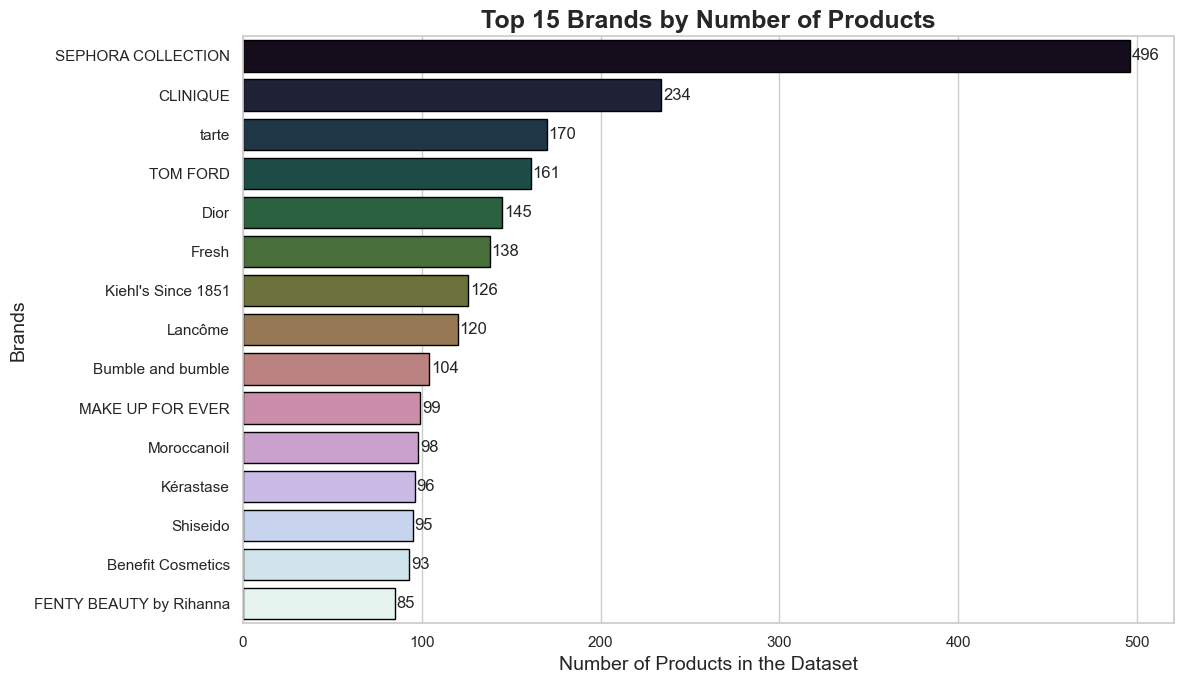

In [114]:
# top 15 brands / brand distribution based on quantity

brand_counts = df['brand'].value_counts().head(15)

# setting theme
sns.set_theme(style="whitegrid")

# creating a bar graph
plt.figure(figsize=(12, 7)) 
sns.barplot(
    x=brand_counts.values,
    y=brand_counts.index,
    palette="cubehelix",
    edgecolor="black"
)

plt.title('Top 15 Brands by Number of Products', fontsize=18, weight='bold')
plt.xlabel('Number of Products in the Dataset', fontsize=14)
plt.ylabel('Brands', fontsize=14)

# adding values to the end of each bar
for i, value in enumerate(brand_counts.values):
    plt.text(value + 1, i, str(value), va='center', fontsize=12)

plt.tight_layout()
plt.show()

#### 4.3 Top 15 Expensive Categories

/var/folders/0n/yl7pnp3931s_z82wsjl43lmr0000gn/T/ipykernel_24414/3128746959.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


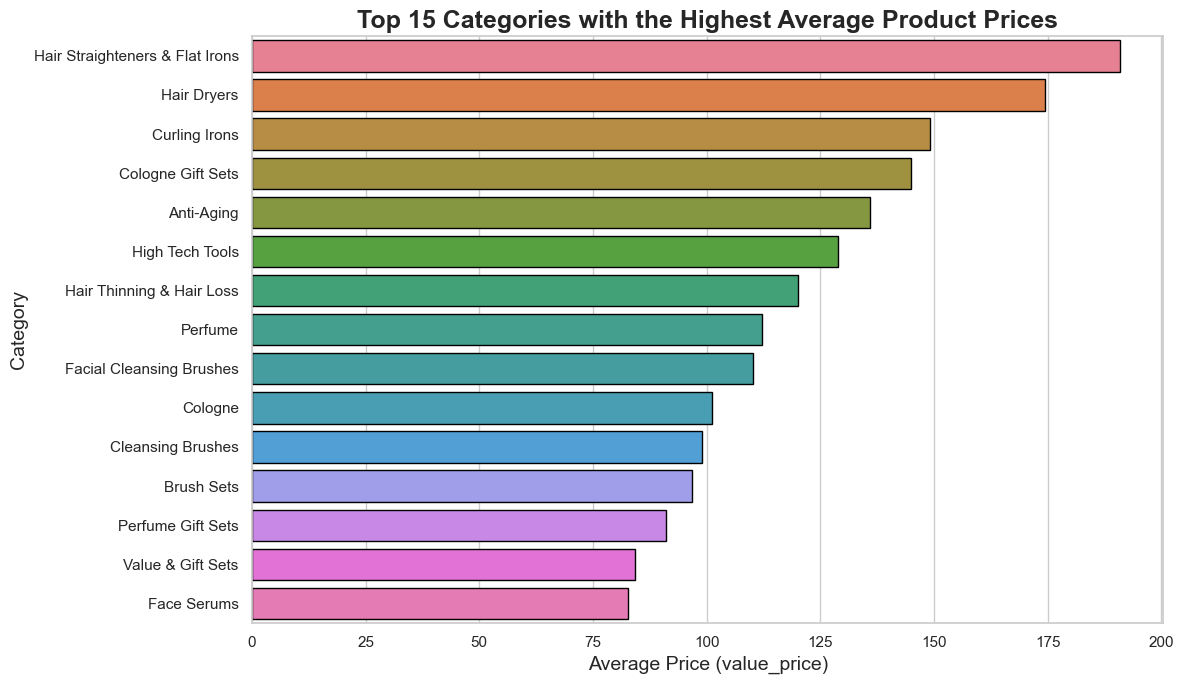

,name,brand,value_price
2589,Airwrap™ Styler,dyson,549.0
2437,SpectraLite™ Faceware Pro Wrinkle Reducing Duo,Dr. Dennis Gross Skincare,504.0
2590,Corrale™ Hair Straightener,dyson,499.0
6427,Neuropeptide Smoothing Facial Conformer,Perricone MD,495.0
444,Elite Mirror Ten Brush Set,Artis,483.0
6064,Trinity Facial Toning Device + Wrinkle Reducer...,NuFACE,474.0
6058,Trinity + Eye and Lip Enhancer Attachment Bundle,NuFACE,474.0
2592,Supersonic™ Hair Dryer Limited Edition Gift Set,dyson,465.0
2591,Supersonic™ Hair Dryer Gift Edition with Red Case,dyson,460.0
3396,Orchidée Impériale The Cream,Guerlain,460.0


In [117]:
# top 15 expensive categories

# calculate the average 'value_price' for each category
avg_price_per_category = df.groupby('category')['value_price'].mean().sort_values(ascending=False).head(15)

# setting the style
sns.set_theme(style="whitegrid")


plt.figure(figsize=(12, 7))
sns.barplot(
    x=avg_price_per_category.values,
    y=avg_price_per_category.index,
    palette="husl",
    edgecolor="black"
)


plt.title('Top 15 Categories with the Highest Average Product Prices', fontsize=18, weight='bold')
plt.xlabel('Average Price (value_price)', fontsize=14)
plt.ylabel('Category', fontsize=14)


plt.tight_layout()
plt.show()

# List the most expensive products
most_expensive_products = df[['name', 'brand', 'value_price']].sort_values(by='value_price', ascending=False).head(10)
most_expensive_products

#### 4.4 Rating Distribution

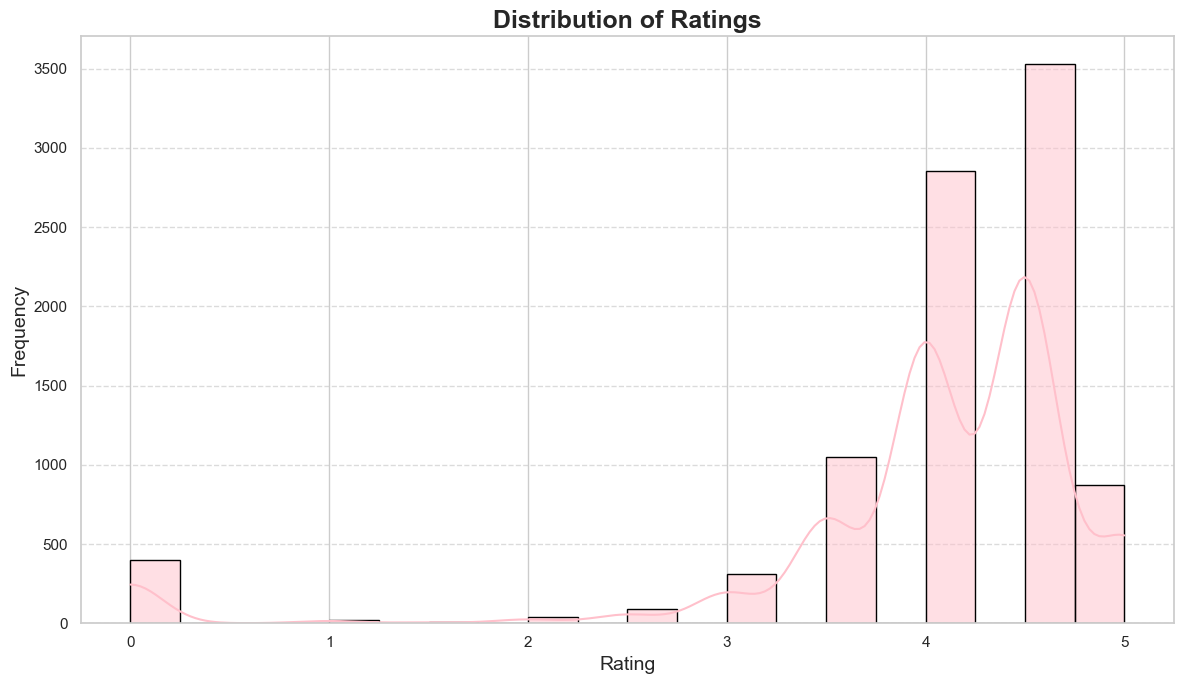

In [119]:
# rating distribution

# setting style
sns.set_theme(style="whitegrid")

# plot 
plt.figure(figsize=(12, 7))
sns.histplot(df['rating'], bins=20, kde=True, color="pink", edgecolor="black")


plt.title('Distribution of Ratings', fontsize=18, weight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# adjust layout and display the plot
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.12/site-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
/var/folders/0n/yl7pnp3931s_z82wsjl43lmr0000gn/T/ipykernel_27020/4184269383.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


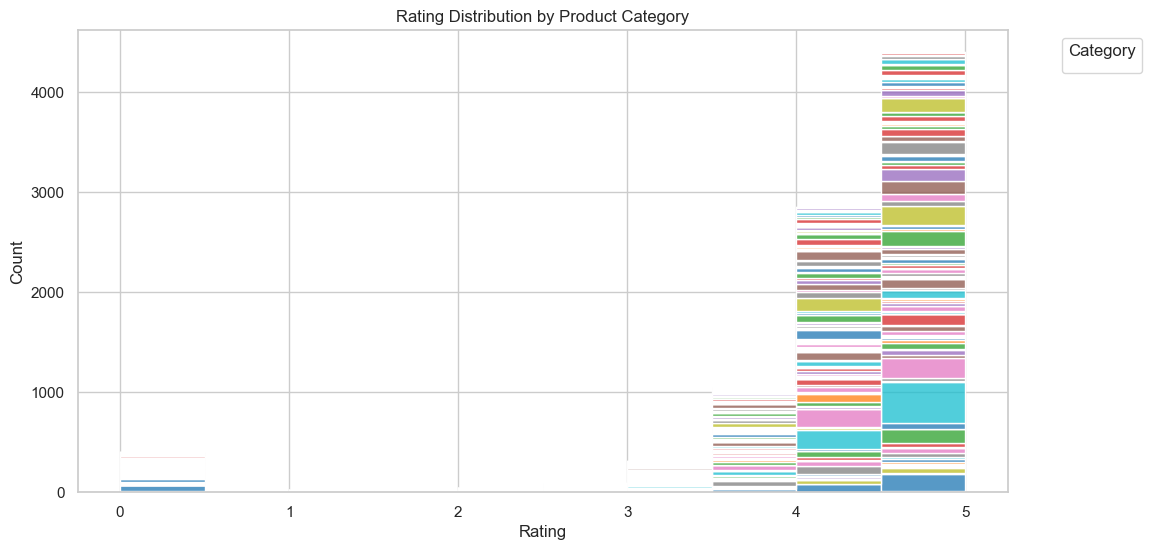

/var/folders/0n/yl7pnp3931s_z82wsjl43lmr0000gn/T/ipykernel_27020/4184269383.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')


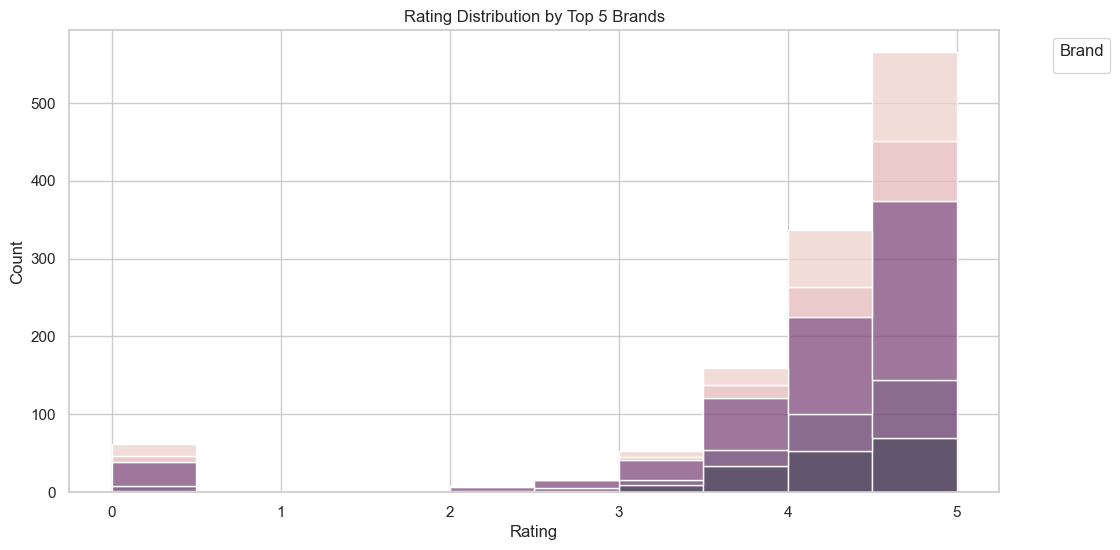

/var/folders/0n/yl7pnp3931s_z82wsjl43lmr0000gn/T/ipykernel_27020/4184269383.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Limited Edition')


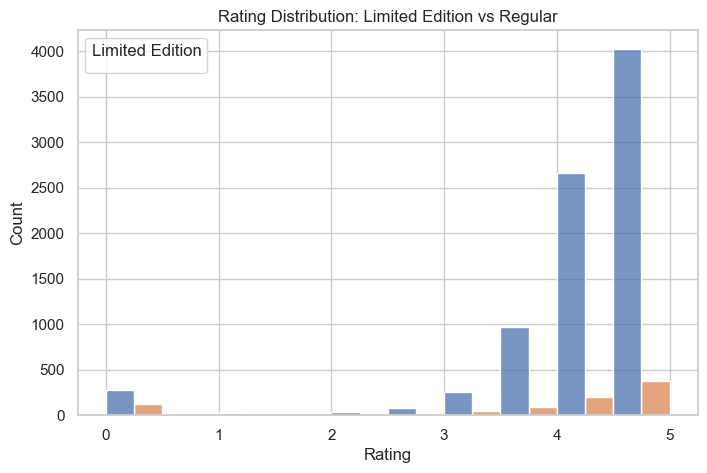

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Rating distribution by Product Category
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='rating', hue='category', multiple='stack', palette='tab10', bins=10)
plt.title('Rating Distribution by Product Category')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Rating distribution by Brand (filtering top brands to avoid clutter)
top_brands = df['brand'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['brand'].isin(top_brands)], x='rating', hue='brand', multiple='stack', bins=10)
plt.title('Rating Distribution by Top 5 Brands')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Rating distribution by Limited Edition
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='rating', hue='limited_edition', multiple='dodge', bins=10)
plt.title('Rating Distribution: Limited Edition vs Regular')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Limited Edition')
plt.show()

In [120]:
# frequency counts
print(df['rating'].value_counts())

rating
4.5    3527
4.0    2853
3.5    1051
5.0     872
0.0     398
3.0     308
2.5      88
2.0      39
1.0      23
1.5       9
Name: count, dtype: int64


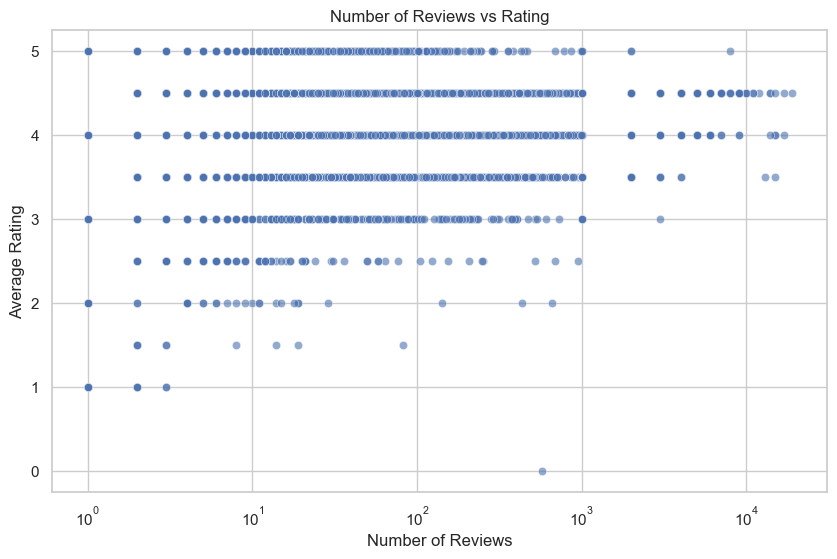

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set(style='whitegrid')

# SCATTER PLOT: Number of Reviews vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='rating', alpha=0.6)

plt.title('Number of Reviews vs Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.xscale('log')  # Optional: log scale if review counts are highly skewed
plt.show()

#### 4.5 Frequent Categories

In [125]:

# count occurrences of each category
category_counts = df['category'].value_counts()

# display the top 10 
print("Top 10 most frequent categories in the dataset:\n")
print(category_counts.head(10).to_frame(name='Frequency'))

Top 10 most frequent categories in the dataset:

                           Frequency
category                            
Perfume                          665
Moisturizers                     451
Face Serums                      384
Value & Gift Sets                378
Face Wash & Cleansers            247
Face Masks                       230
Rollerballs & Travel Size        228
Hair Styling Products            224
Eye Palettes                     202
Lipstick                         191


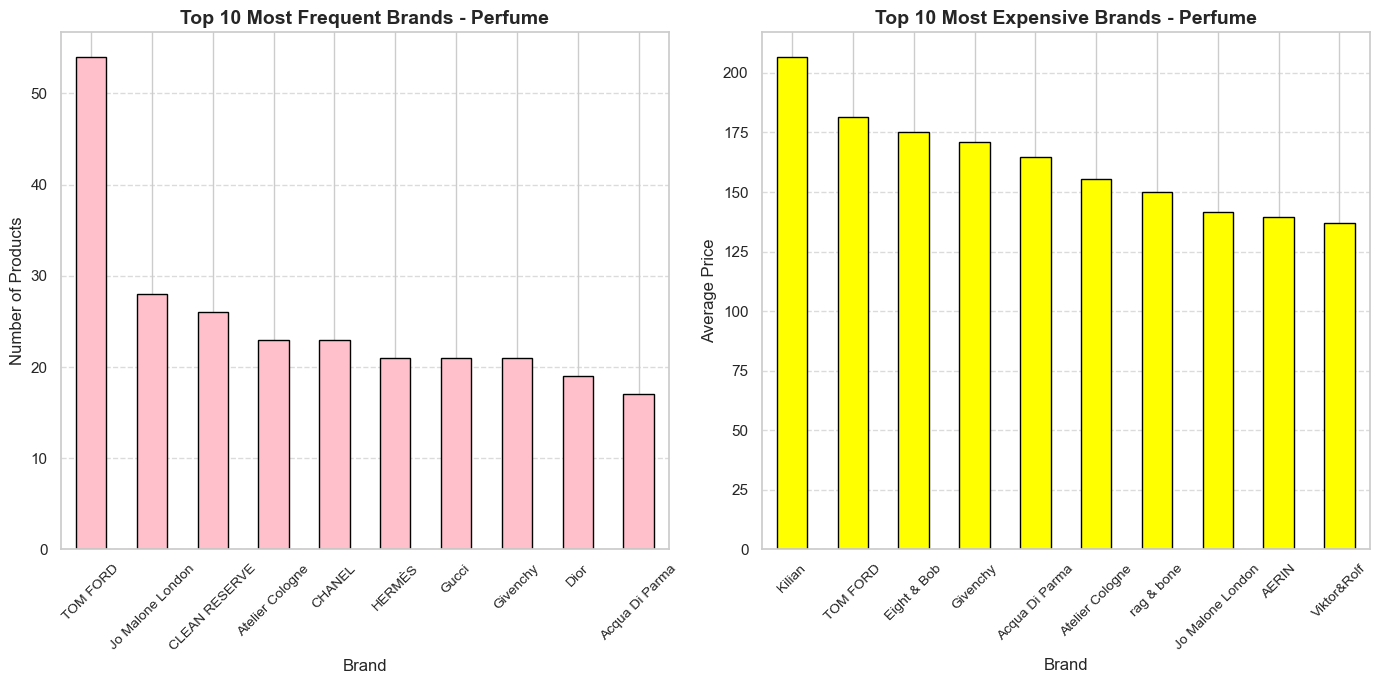

In [127]:

# filter the data for the "Perfume" category
perfume_df = df[df['category'] == 'Perfume']

# count the most frequent brands 
brand_counts = perfume_df['brand'].value_counts()

# find the most expensive brands 
brand_avg_price = perfume_df.groupby('brand')['price'].mean().sort_values(ascending=False)

# plot the most frequent brands
plt.figure(figsize=(14, 7))

# subplot for top 10 most frequent brands
plt.subplot(1, 2, 1)
brand_counts.head(10).plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 10 Most Frequent Brands - Perfume', fontsize=14, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# subplot for top 10 most expensive brands
plt.subplot(1, 2, 2)
brand_avg_price.head(10).plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Top 10 Most Expensive Brands - Perfume', fontsize=14, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# adjust layout and show the plots
plt.tight_layout()
plt.show()

#### 4.6 Most Frequent Words in Details Column

In [130]:

# define list of claims/keywords
claims = [
    'free', 'natural', 'organic', 'fine lines', 'wrinkles', 'healthy', 
    'cruelty free', 'sensitive skin', 'acne', 'aging', 'clinical', 
    'revitalizing', 'age', 'botanical', 'instant', 'firming', 'results', 
    'volumizing', 'growth', 'clinically tested', 'ethical'
]

# vectorized claim counting using str.contains
claim_counts_df = (
    pd.DataFrame({
        claim: df['details_cleaned'].str.contains(claim, case=False, na=False).sum()
        for claim in claims
    }, index=['count']).T
    .sort_values(by='count', ascending=False)
)

# display the result
print("Claim frequencies in product details:")
print(claim_counts_df)

Claim frequencies in product details:
                   count
free                5206
age                 3695
natural             2919
aging               1880
results             1720
fine lines          1452
wrinkles            1348
clinical            1070
healthy             1061
instant              888
acne                 365
botanical            355
organic              284
sensitive skin       277
volumizing           178
firming              129
growth                85
revitalizing          79
clinically tested     67
cruelty free          38
ethical               20


### 5. Baseline Models 

In this section, we will build two baseline models: linear regression and decision tree.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# drop unhelpful text columns
columns_to_drop = ['id', 'name', 'details', 'ingredients', 'how_to_use', 'options']
df_model = df.drop(columns=columns_to_drop)
df_model = df_model.dropna()  # this drops rows where *any* column has NaN
X = df_model.drop(columns='rating')
y = df_model['rating']

# encode object (categorical) columns
categorical_cols = df_model.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le  # store encoders if you need inverse transforms later

# drop rows with missing ratings
df_model = df_model.dropna(subset=['rating'])

# define features (X) and target (y)
X = df_model.drop(columns='rating')
y = df_model['rating']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1)
}

baseline_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    baseline_results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Display results
pd.DataFrame(baseline_results).T

,MSE,R2
Linear Regression,0.578931,0.022863
Decision Tree,0.506623,0.144907


#### Linear Regression Model:
MSE = 0.578931: An MSE around 0.5–0.6 suggests predictions are off by about 0.7–0.8 stars on average (since RMSE ≈ √MSE).

R² = 0.022863: Only 2% of the variance in the target variable is explained by the model. This is very low, meaning the linear regression model is not capturing the relationships in the data well. 

#### Decision Tree Model:
MSE = 0.506623: This is much lower than the MSE of linear regression, meaning the decision tree model predicts values more accurately.

R² = 0.144907: Even though this is still below 2%, it's greater than the linear regression's, which is better. 
It’s not perfect, but it is a reasonable fit. 


The decision tree captures non-linear relationships in the data that the linear regression model cannot. This is primarily due to the dataset having non-linear patterns and skewed distributions. 



### 6. Advanced Modeling and Optimization

To get a better predictive model, we will use a more tuned version of the decision tree: random forest. This model will build multiple trees which leads to higher accuracy and better generalization. 

In [34]:
# ensuring needed libraries are imported 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# drop unhelpful columns
columns_to_drop = ['id', 'name', 'details', 'ingredients', 'how_to_use', 'options']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# encode categorical (object-type) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)  # Ensure consistency
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# drop rows with missing target values
df = df.dropna(subset=['rating'])

# separate features and target
X = df.drop("rating", axis=1)
y = df["rating"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

# predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.4f}")
print(f"Random Forest R²: {r2:.4f}")

Random Forest MSE: 0.2732
Random Forest R²: 0.7398


MSE = 0.2732: RMSE ≈ √0.3039 ≈ 0.55. On average, this model predicts within half a star of the actual rating.

R² = 0.7398: This model explains nearly 75% of the variance in product ratings, which is a strong signal that the features are meaningful and that Random Forest is capturing non-linear patterns and interactions effectively.

#### Optimizing The Model

To optimize this model, some hyperparameter tuning will be conducted. GridSearchCV searches through a grid of hyperparameter combinations to find the best settings for a machine learning model.

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]

}

# initialize model
rf = RandomForestRegressor(random_state=1)

# initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  
    scoring='r2',  
    n_jobs=-1,     
    verbose=2
)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on Validation Sets:", grid_search.best_score_)

# evaluate best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Test Set MSE (Best Model): {mse_best:.4f}")
print(f"Test Set R² (Best Model): {r2_best:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best R² Score on Validation Sets: 0.7257978163200326
Test Set MSE (Best Model): 0.2716
Test Set R² (Best Model): 0.7413


This model explains ~74% of the variance in actual product ratings on the test set.
The RMSE ≈ √0.2716 ≈ 0.52 star, so on average, this model is predicting within half a star of the real rating.


Below, we can visually see the features that are most important when predicting the ratings.

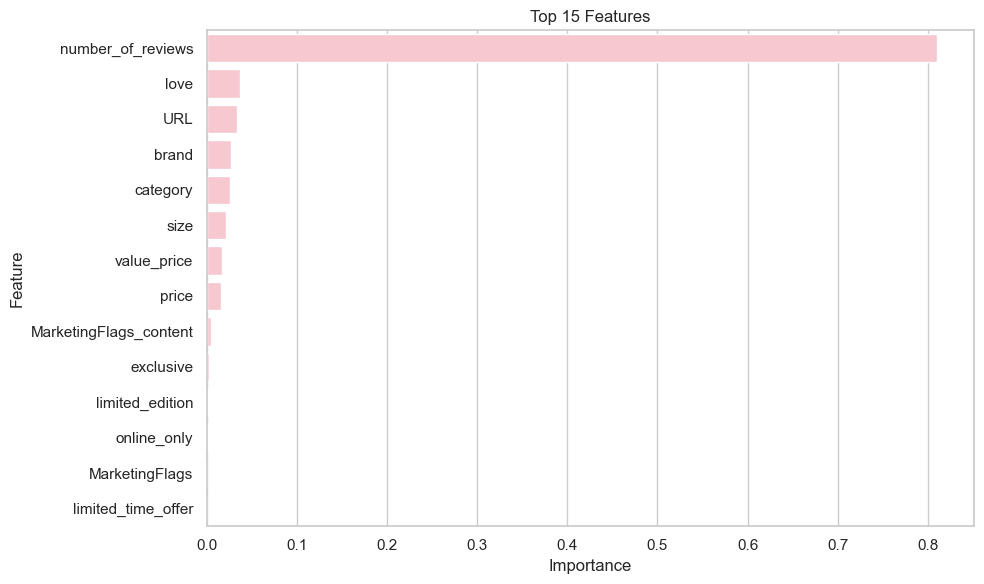

In [71]:
# plotting top 15 features
importances = best_model.feature_importances_
feat_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), color='pink')
plt.title("Top 15 Features")
plt.tight_layout()
plt.show()

### 7. Model Comparisons and Evaluations

In [47]:

# store results
model_results = {
    'Linear Regression': {'MSE': 0.5789, 'R2': 0.0229},
    'Decision Tree': {'MSE': 0.5066, 'R2': 0.1449},
    'Random Forest': {'MSE': 0.2732, 'R2': 0.7398},
    'Tuned RF': {'MSE': 0.2716, 'R2': 0.7413}
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results).T.reset_index().rename(columns={'index': 'Model'})

/var/folders/0n/yl7pnp3931s_z82wsjl43lmr0000gn/T/ipykernel_27020/2897514306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, ax=axes[0], palette='PiYG')
/var/folders/0n/yl7pnp3931s_z82wsjl43lmr0000gn/T/ipykernel_27020/2897514306.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df, ax=axes[1], palette='Blues')


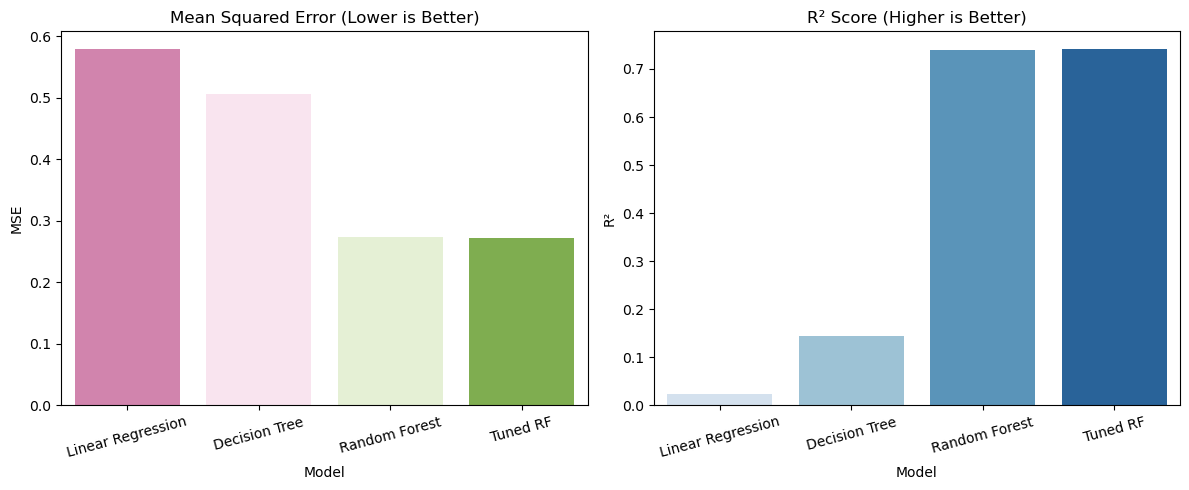

In [49]:
# Plot MSE and R² side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MSE plot
sns.barplot(x='Model', y='MSE', data=results_df, ax=axes[0], palette='PiYG')
axes[0].set_title("Mean Squared Error (Lower is Better)")
axes[0].set_ylabel("MSE")
axes[0].tick_params(axis='x', rotation=15)

# R² plot
sns.barplot(x='Model', y='R2', data=results_df, ax=axes[1], palette='Blues')
axes[1].set_title("R² Score (Higher is Better)")
axes[1].set_ylabel("R²")
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

### Testing out Random Forest Classification instead of Regression

Accuracy: 0.7339
Precision (weighted): 0.6578
Recall (True Positive Rate, weighted): 0.7339
F1 Score (weighted): 0.6736


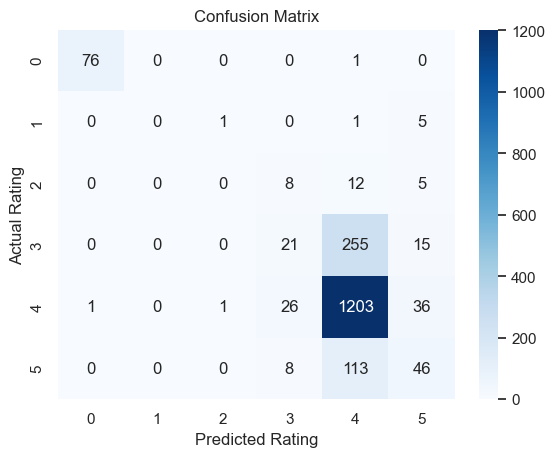

False Positive Rate per class:
Class 0: 0.0006
Class 1: 0.0000
Class 2: 0.0011
Class 3: 0.0272
Class 4: 0.6737
Class 5: 0.0366
Multiclass ROC AUC: 0.8342


In [77]:
# once again making sure all libraries needed are here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

##                                              preparing data 
# drop unnecssary columns
columns_to_drop = ['id', 'name', 'details', 'ingredients', 'how_to_use', 'options']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# drop missing ratings
df = df.dropna(subset=['rating'])

# convert ratings to integer 
df['rating'] = df['rating'].astype(int)

# split data
X = df.drop(columns='rating')
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




##                                      training the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)




##                                       evaluating the metrics 

# basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (True Positive Rate, weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.show()

##                                   False Positive Rate per class 
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
TN = conf_matrix.sum() - (conf_matrix.sum(axis=1) + conf_matrix.sum(axis=0) - np.diag(conf_matrix))
FPR_per_class = FP / (FP + TN)

print("False Positive Rate per class:")
for i, fpr in enumerate(FPR_per_class, start=min(y.unique())):
    print(f"Class {i}: {fpr:.4f}")

##                                     ROC AUC for multiclass ----

# binarize labels
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_prob = clf.predict_proba(X_test)

# calculate multiclass AUC
auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print(f"Multiclass ROC AUC: {auc:.4f}")

As you can see, 73.4% of predictions are exactly correct. When the model predicts a rating, it’s correct ~66% of the time.
The model also retrieves ~73% of the actual labels correctly. Same as accuracy because the macro/micro recall match. It balances precision and recall because it has a solid F1 for multi-class classification. It also distinguishes between classes well overall.

However, False Positive Rate for Class 4 is 0.6737, which means Class 4 is heavily over-predicted, possibly due to class imbalance.


### 8. Conclusion

After much data analysis, buildings of differennt models, and fine-tuning, the best fit model for predicting product ratings is random forest regression. This is because it has strong characteristics such as a low mean squared error and a high coefficient of determination. Not only are they strong alone, they are strong against the other models such as linear regression and decision tree. 

After first exploring which was better, linear regression or decision tree, random forest regression was explored and fine-tuned so it performed more efficiently. Having done this, random forest classification was also tested for further analysis. Although this model had multiple strong points such as a balanced F1 score, it had a high False Positive for a class, most likely due to class domination since this type of tree outputs majority vote in leaf.

Therefore, random forest regression is the best model for predicting product ratings from beauty websites like Sephora. 